##### Author: Vincent Yeo

## Image Recognition with MNIST dataset

#### Background:

The MNIST database contains 70000 images of handwritten digits from 0 to 9, a subset of the [NIST](https://www.nist.gov/srd/nist-special-database-19) database, that has been preprocessed in normalising size and centering of the image.

The authors have offer it to the world for machine learning and pattern recogrnition methods

From LeCun, Y., Cortes, C. & Burges, C. J. C (n.d.). THE MNIST DATABASE of handwritten digits. Retrieved from http://yann.lecun.com/exdb/mnist/

#### Task:
+ Classify the digits correctly.


In [15]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D 
from keras.utils import np_utils

import matplotlib.pyplot as plt     
import matplotlib.cm as cm 
import numpy as np

In [16]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Basic Image Processing and Visualization

In [17]:
# To display original image and processed image
def displayImage(image, image_filter):
    im = X_train[image]
    width = im.shape[0]
    height = im.shape[1]
    imC = np.zeros((width-2, height-2))
    
    for row in range(1, width-1):
        for col in range(1, height-1):
            for i in range(len(image_filter[0])):
                for j in range(len(image_filter)):
                    imC[row-1][col-1] += im[row-1+i][col-1+j] * image_filter[i][j]
                
            if imC[row-1][col-1] > 255:
                imC[row-1][col-1] = 255
            elif imC[row-1][col-1] < 0:
                imC[row-1][col-1] = 0
            
    plt.imshow(im, cmap=cm.Greys_r)
    plt.show()
    plt.imshow(imC/255, cmap=cm.Greys_r)
    plt.show()

In [18]:
# filters
blur = [
        [1/10,1/10,1/10],
        [1/10,1/10,1/10],
        [1/10,1/10,1/10],
]

edges = [
    [1, 1, 1],
    [1, -9, 1],
    [1, 1, 1]
]

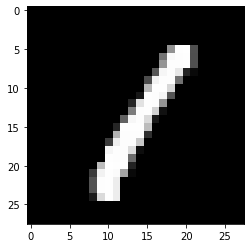

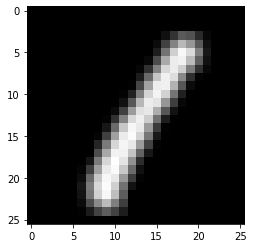

In [19]:
displayImage(3, blur)

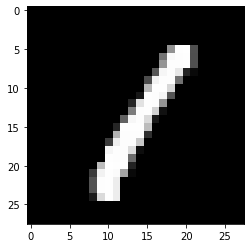

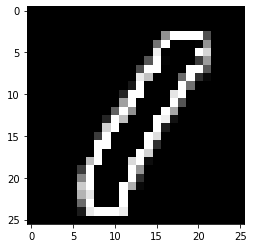

In [20]:
displayImage(3, edges)

In [21]:
# Size of the Training and Test set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [22]:
# convert 2d arrays into 1d
X_train = X_train.reshape(60000, 784)     
X_test = X_test.reshape(10000, 784)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [23]:
# 10 classes for digits 0 to 9
classes = 10
Y_train = np_utils.to_categorical(y_train, classes)     
Y_test = np_utils.to_categorical(y_test, classes)

In [24]:
# Import early stopping from keras callbacks
from keras.callbacks import EarlyStopping
# Instantiate an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

epochs = 100
batch_size = 100

model = Sequential()     
model.add(Dense(100, input_shape=(784, ), activation='sigmoid'))     

# Hidden layers
model.add(Dense(100, activation='sigmoid'))

# Output Layers
model.add(Dense(10, activation='softmax')) 

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

history = model.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs, verbose=1, callbacks = [early_stopping])

score = model.evaluate(X_test, Y_test, verbose=1)
print('Test accuracy:', score[1]) 






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/100





60000/60000 [==============================] - 6s 100us/step - loss: 1.9327 - acc: 0.5853 - val_loss: 1.5630 - val_acc: 0.7561
Epoch 2/100
60000/60000 [==============================] - 5s 79us/step - loss: 1.2708 - acc: 0.8010 - val_loss: 1.0066 - val_acc: 0.8394
Epoch 3/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.8535 - acc: 0.8536 - val_loss: 0.7096 - val_acc: 0.8751
Epoch 4/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.6339 - acc: 0.8781 - val_loss: 0.5538 - val_acc: 0.8903
Epoch 5/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.5155 - acc: 0.8916 - val_loss: 0.4621 - val_acc: 0.8978
Epoch 6/100
60000/60000 [==============================] - 8s 133us/step - loss: 0.4439 - acc: 0.8996 - val_loss: 0.4112 - val_acc: 0.9043
Epoch 7/100
6

60000/60000 [==============================] - 5s 84us/step - loss: 0.1588 - acc: 0.9561 - val_loss: 0.1779 - val_acc: 0.9487
Epoch 38/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.1566 - acc: 0.9558 - val_loss: 0.1807 - val_acc: 0.9483
Epoch 39/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.1515 - acc: 0.9572 - val_loss: 0.1757 - val_acc: 0.9499
Epoch 40/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.1517 - acc: 0.9575 - val_loss: 0.1731 - val_acc: 0.9496
Epoch 41/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.1497 - acc: 0.9578 - val_loss: 0.1735 - val_acc: 0.9488
Epoch 42/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.1456 - acc: 0.9589 - val_loss: 0.1694 - val_acc: 0.9512
Epoch 43/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.1468 - acc: 0.9593 - val_loss: 0.1730 - val_acc: 0.9519
Epoch 44/100
60000/60000 [==============

Epoch 96/100
10000/10000 [==============================] - 1s 71us/step
Test accuracy: 0.962


The model achieved a 96.2% accuracy in classifying the handwritten digits

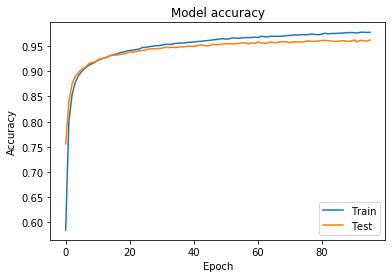

In [25]:
# Plot train vs test accuracy per epoch
plt.figure()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

The model accuracy increase sharply within 20 epoches to 90%.

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


#### Results and Analysis:
The CNN has achieved a 96.2% test accuracy.